# 1 Basic operation on Image
(a) Adjust the brightness of an image by modifying pixel intensity values.

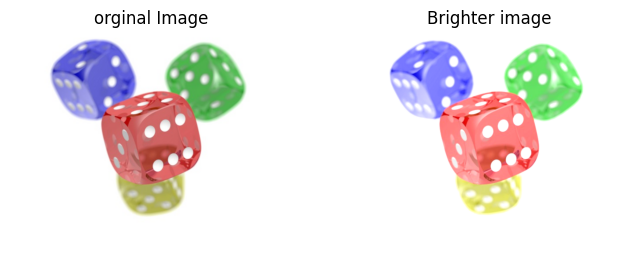

In [ ]:
image_path = "cube.jpg"
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
my_img = Image.open(image_path)

img_bright = ImageEnhance.Brightness(my_img)
img_bright_2 = img_bright.enhance(1.3)
fig, ax = plt.subplots(1,2, figsize = [8,10])

ax[0].set_title("orginal Image")
ax[0].axis("off")
ax[0].imshow(my_img)

ax[1].set_title("Brighter image")
ax[1].axis("off")
ax[1].imshow(img_bright_2)

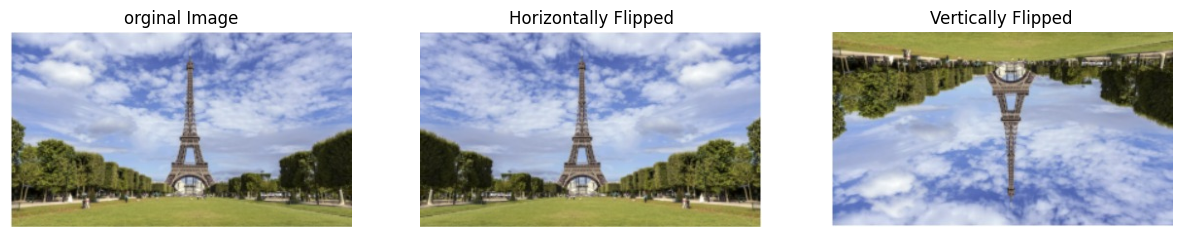

In [3]:
# (b) Flip an image horizontally and vertically to demonstrate axis-based transformations.
image_path = "tower.jpg"
from PIL import Image
import matplotlib.pyplot as plt
my_img = Image.open(image_path)

img_horizontal = my_img.transpose(Image.FLIP_LEFT_RIGHT)
img_vertical = my_img.transpose(Image.FLIP_TOP_BOTTOM)
fig, ax = plt.subplots(1,3,figsize = [15,8])

ax[0].set_title("orginal Image")
ax[0].axis("off")
ax[0].imshow(my_img)

ax[1].set_title("Horizontally Flipped")
ax[1].axis("off")
ax[1].imshow(img_horizontal)

ax[2].set_title("Vertically Flipped")
ax[2].axis("off")
ax[2].imshow(img_vertical)
plt.show()

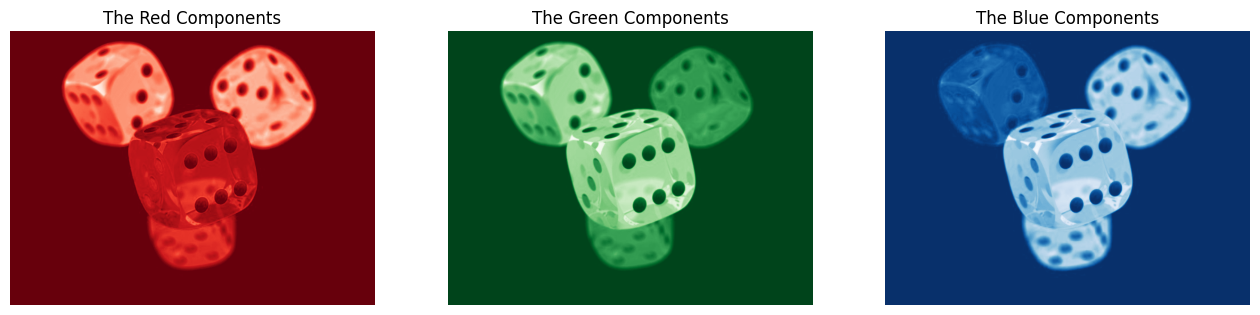

In [ ]:
# (C) Extract and display individual red, green, and blue channels of an RGB image.
image_path = "Cube.jpg"
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
my_img = Image.open(image_path)
rgb_img = my_img.convert('RGB')
r, g, b = rgb_img.split()


fig, ax = plt.subplots(1,3,figsize = (16,20))
ax[0].imshow(r, cmap='Reds')
ax[1].imshow(g, cmap='Greens')
ax[2].imshow(b, cmap='Blues')

ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")

ax[0].set_title("The Red Components")
ax[1].set_title("The Green Components")
ax[2].set_title("The Blue Components")

plt.show()

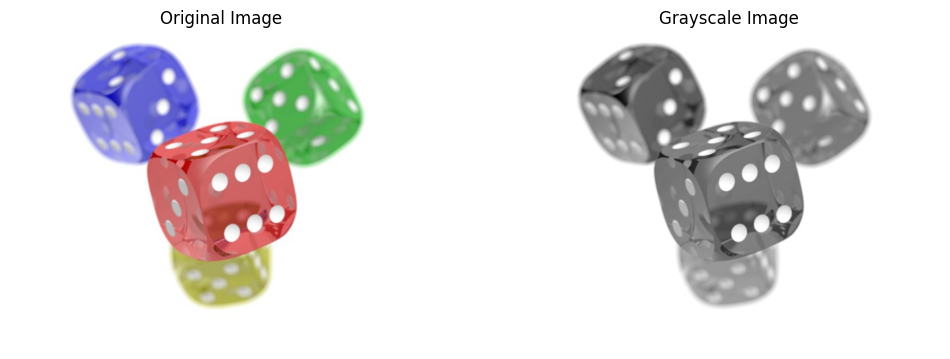

In [5]:
# (D) Display of gray scale images.
# Load image
image_path = "cube.jpg"
my_img = Image.open(image_path)

from PIL import Image 
import matplotlib.pyplot as plt

# Convert to grayscale
img_gray = my_img.convert("L")

# Plot original and grayscale
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title("Original Image")
ax[0].axis("off")
ax[0].imshow(my_img)

ax[1].set_title("Grayscale Image")
ax[1].axis("off")
ax[1].imshow(img_gray, cmap="gray")  # use cmap to display properly

plt.show()

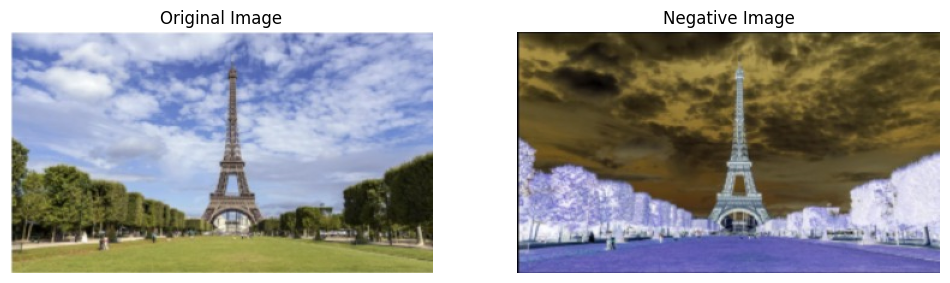

In [6]:
# (E) To find the negative of an image.

# Step 1: Load the image
image_path = "tower.jpg"
image = Image.open(image_path)

from PIL import Image
import matplotlib.pyplot as plt

# Step 2: Convert image to NumPy array
import numpy as np
img_array = np.array(image)

# Step 3: Compute negative
negative_img = 255 - img_array

# Step 4: Display original and negative images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axes[0].imshow(img_array)
axes[0].set_title("Original Image")
axes[0].axis("off")

# Negative image
axes[1].imshow(negative_img)
axes[1].set_title("Negative Image")
axes[1].axis("off")

plt.show()

# 2. Using histogram for image quality analysis
A. Calculate the Histogram of a given image.

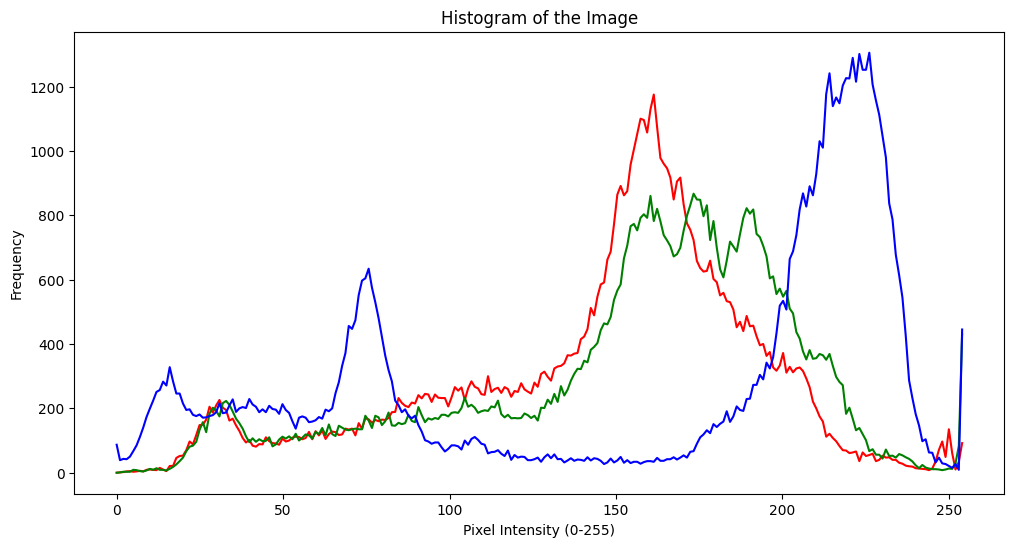

In [ ]:
# Import libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = "tower.jpg"
image = Image.open(image_path)

# Step 2: Convert image to NumPy array
img_array = np.array(image)

# Step 3: Plot histogram for each channel
colors = ('red', 'green', 'blue')
channel_ids = (0, 1, 2)

plt.figure(figsize=(12, 6))

for channel_id, color in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(img_array[:, :, channel_id], 
                                        bins=256, range=(0, 255))
    plt.plot(bin_edges[0:-1], histogram, color=color)

plt.title("Histogram of the Image")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.show()

In [8]:
!pip install opencv-python

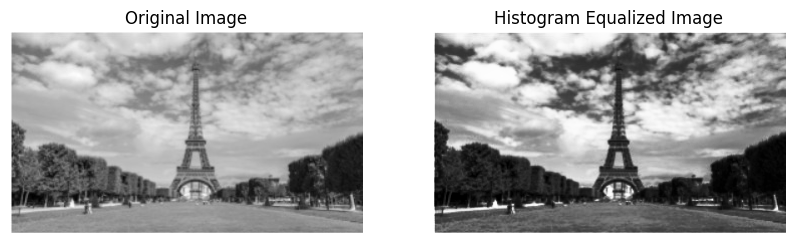

In [9]:
# B. histogram equalization

import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv2.imread("tower.jpg",0)

# Apply Histogram Equalization
equalized_img = cv2.equalizeHist(img)

# Plot only Original and Equalized Images
plt.figure(figsize=(10,5)) 

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis("off")
plt.show()

# 3.Program for Image Filtering
(A) Low pass filter => 1)Average filter2)Weighted Average filter3)Median filter High pass filters using=>1) Sobel operator2) Laplacian operator

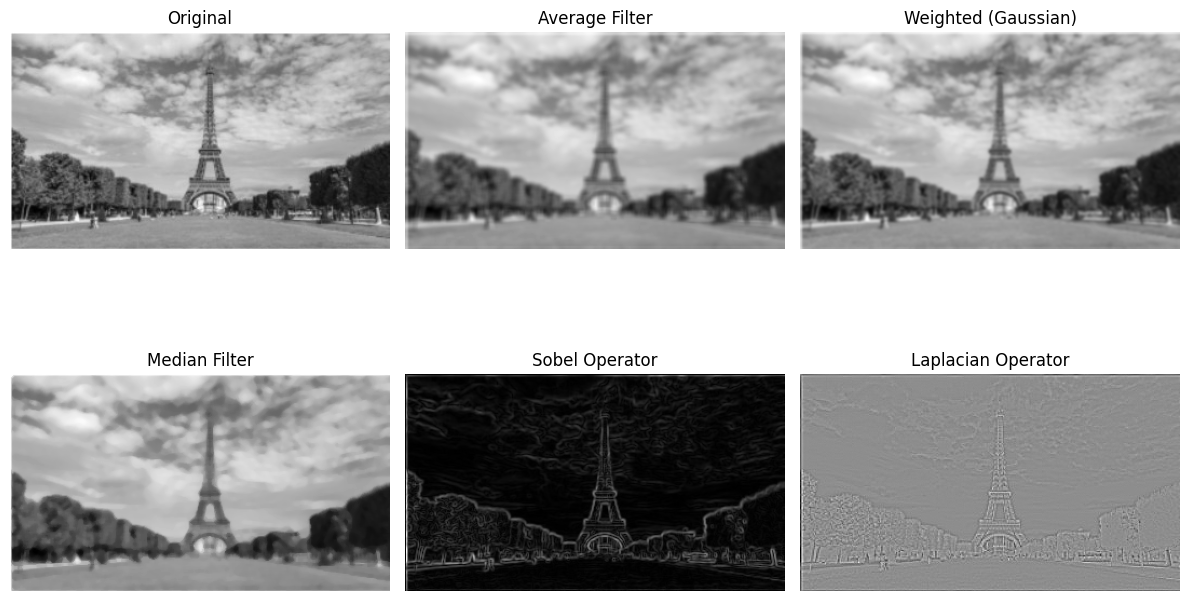

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (grayscale for simplicity)
img = cv2.imread("tower.jpg", cv2.IMREAD_GRAYSCALE)

# ---------------- Low Pass Filters ---------------- #

# 1. Average Filter (mean filter)
avg_kernel = np.ones((5,5add), np.float32) / 25
average_filter = cv2.filter2D(img, -1, avg_kernel)

# 2. Weighted Average Filter (Gaussian blur)
weighted_filter = cv2.GaussianBlur(img, (5,5), 0)

# 3. Median Filter
median_filter = cv2.medianBlur(img, 5)

# ---------------- High Pass Filters ---------------- #

# 1. Sobel Operator (edge detection)
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

# 2. Laplacian Operator
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# ---------------- Visualization ---------------- #
titles = [
    "Original", "Average Filter", "Weighted (Gaussian)", "Median Filter",
    "Sobel Operator", "Laplacian Operator"
]
images = [
    img, average_filter, weighted_filter, median_filter,
    sobel, laplacian
]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

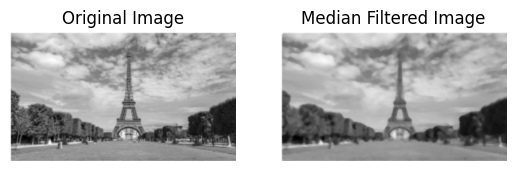

In [11]:
# (B) Design non-linear filtering.

import cv2
import matplotlib.pyplot as plt

# Read image (use full path if necessary)
img_path = "tower.jpg"

# Check if image loaded
if img is None:
    raise FileNotFoundError("Image not found. Check the file path.")

# Apply Non-linear filtering (Median Filter)
filtered_img = cv2.medianBlur(img, 5)

# Display original and filtered images
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Median Filtered Image")
plt.imshow(filtered_img, cmap='gray')
plt.axis('off')
plt.show()

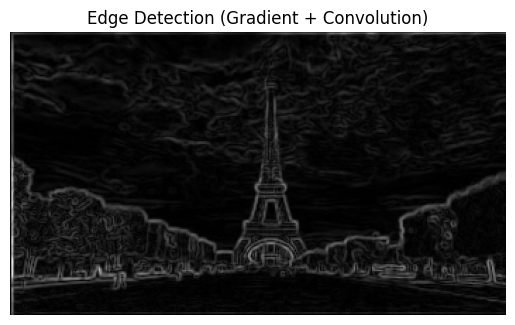

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and convert to grayscale
img = cv2.imread("tower.jpg")   # change filename if needed
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Define Sobel kernels
Kx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]], dtype=np.float32)

Ky = np.array([[-1, -2, -1],
               [ 0,  0,  0],
               [ 1,  2,  1]], dtype=np.float32)

# Step 3: Convolution with kernels
Gx = cv2.filter2D(gray, cv2.CV_32F, Kx)  # gradient in x
Gy = cv2.filter2D(gray, cv2.CV_32F, Ky)  # gradient in y

# Step 4: Gradient magnitude (final edge detection)
G = np.sqrt(Gx**2 + Gy**2)
G = (G / G.max()) * 255   # normalize 0–255
G = G.astype(np.uint8)

# Step 5: Show final result
plt.imshow(G, cmap="gray")
plt.title("Edge Detection (Gradient + Convolution)")
plt.axis("off")
plt.show()

# 4 Finding Threshold of Images
(A) Program to find threshold of grayscale image.

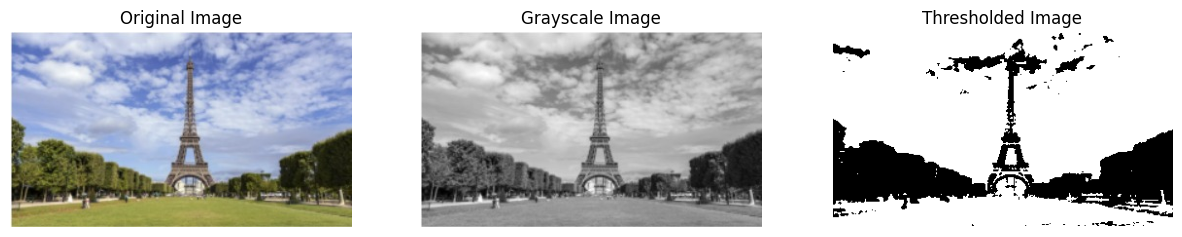

In [13]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load original image
image_path = "Tower.jpg"  # your uploaded file
img = cv2.imread(image_path)

# Step 2: Convert to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 3: Apply threshold
threshold_value = 128
_, binary_img = cv2.threshold(gray_img, threshold_value, 255, cv2.THRESH_BINARY)

# Step 4: Display results (Original, Grayscale, Thresholded)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original image (convert BGR → RGB for matplotlib)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

# Grayscale
ax[1].imshow(gray_img, cmap="gray")
ax[1].set_title("Grayscale Image")
ax[1].axis("off")

# Thresholded
ax[2].imshow(binary_img, cmap="gray")
ax[2].set_title("Thresholded Image")
ax[2].axis("off")

plt.show()

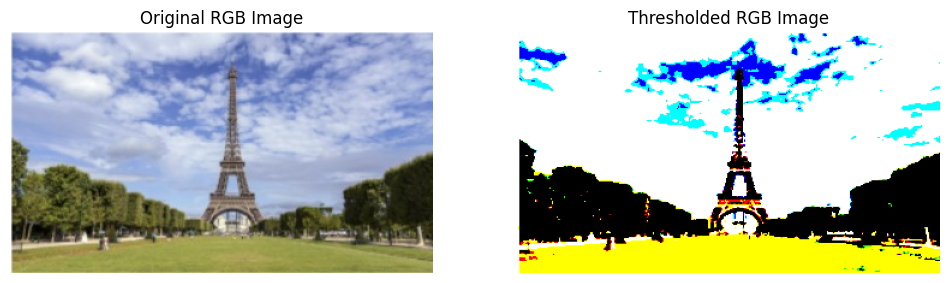

In [14]:
# (B) Program to find threshold of RGB image.

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the RGB image
image_path = "Tower.jpg"  # your uploaded file
img = cv2.imread(image_path)

# Convert from BGR (OpenCV default) to RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 2: Apply threshold to each channel (R, G, B separately)
threshold_value = 128
_, R = cv2.threshold(rgb_img[:,:,0], threshold_value, 255, cv2.THRESH_BINARY)
_, G = cv2.threshold(rgb_img[:,:,1], threshold_value, 255, cv2.THRESH_BINARY)
_, B = cv2.threshold(rgb_img[:,:,2], threshold_value, 255, cv2.THRESH_BINARY)

# Merge thresholded channels back into an RGB image
thresholded_rgb = cv2.merge([R, G, B])

# Step 3: Display Original and Thresholded side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original RGB
ax[0].imshow(rgb_img)
ax[0].set_title("Original RGB Image")
ax[0].axis("off")

# Thresholded RGB
ax[1].imshow(thresholded_rgb)
ax[1].set_title("Thresholded RGB Image")
ax[1].axis("off")

plt.show()

# 6 Program to estimate and subtract the background of an image.


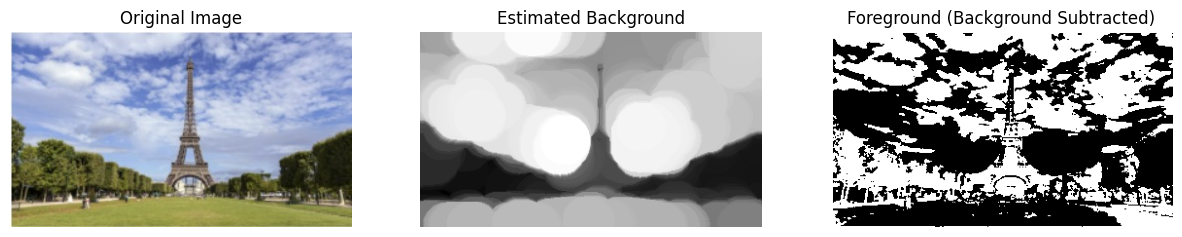

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image_path = "Tower.jpg"  # uploaded image
img = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Step 2: Estimate background using morphological opening
# (large kernel to remove small details and keep background)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
background = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)

# Step 3: Subtract background from the original grayscale image
foreground = cv2.absdiff(gray, background)

# Optional: Threshold to make foreground clearer (binary form)
_, foreground_bin = cv2.threshold(foreground, 30, 255, cv2.THRESH_BINARY)

# Step 4: Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Original Image
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis("off")

# Estimated Background
ax[1].imshow(background, cmap="gray")
ax[1].set_title("Estimated Background")
ax[1].axis("off")

# Foreground (Background Subtracted)
ax[2].imshow(foreground_bin, cmap="gray")
ax[2].set_title("Foreground (Background Subtracted)")
ax[2].axis("off")

plt.show()


# 7 Program to convert color image to gray and hsv.


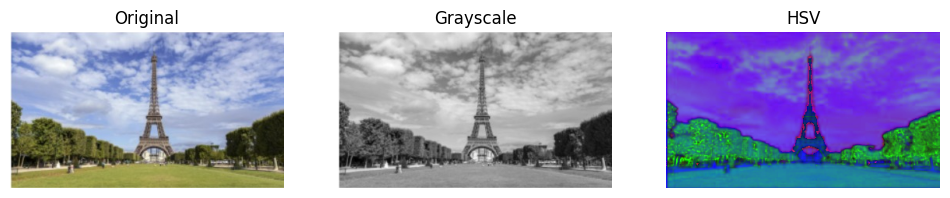

In [16]:
# 7 Program to convert color image to gray and hsv.

import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("Tower.jpg")

# Convert from BGR (OpenCV default) to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Plot all images
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(hsv)
plt.title("HSV")
plt.axis("off")

plt.show()

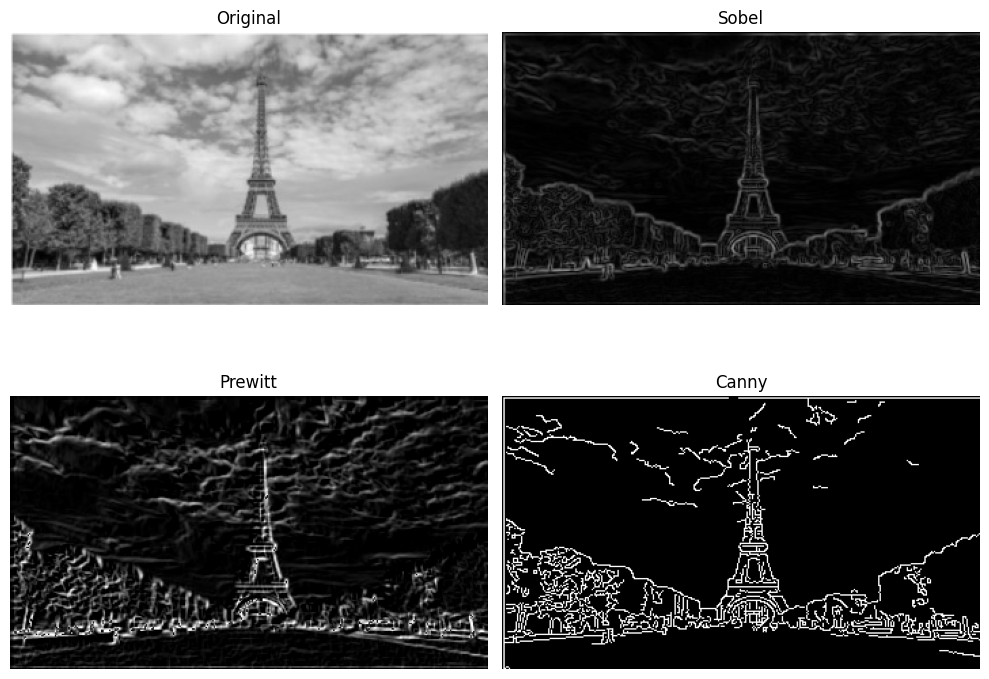

In [17]:
# 8(A). Determination of edge detection using operators.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Tower.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# ---------------- Sobel ----------------
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# ---------------- Prewitt ----------------
# Prewitt kernels
kernelx = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
kernely = np.array([[-1,-1,-1], [0,0,0], [1,1,1]])

prewittx = cv2.filter2D(gray, -1, kernelx)
prewitty = cv2.filter2D(gray, -1, kernely)
prewitt = prewittx + prewitty

# ---------------- Canny ----------------
canny = cv2.Canny(gray, 100, 200)

# ---------------- Plotting ----------------
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(sobel, cmap="gray")
plt.title("Sobel")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(prewitt, cmap="gray")
plt.title("Prewitt")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(canny, cmap="gray")
plt.title("Canny")
plt.axis("off")

plt.tight_layout()
plt.show()

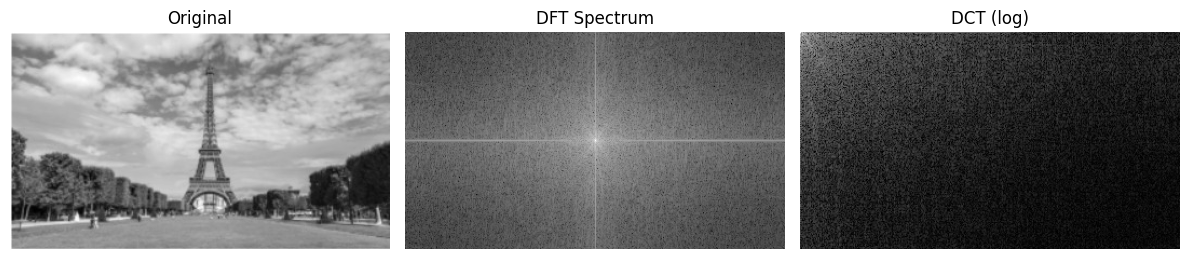

In [18]:
 # (B) 2-D DFT and DCT.

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Tower.jpg", 0)  # grayscale

# ------------------ 2D DFT ------------------
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)   # shift zero freq to center
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

# ------------------ 2D DCT ------------------
dct = cv2.dct(np.float32(img))
dct_log = np.log(abs(dct) + 1)

# ------------------ Plotting ------------------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("DFT Spectrum")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(dct_log, cmap="gray")
plt.title("DCT (log)")
plt.axis("off")

plt.tight_layout()
plt.show()


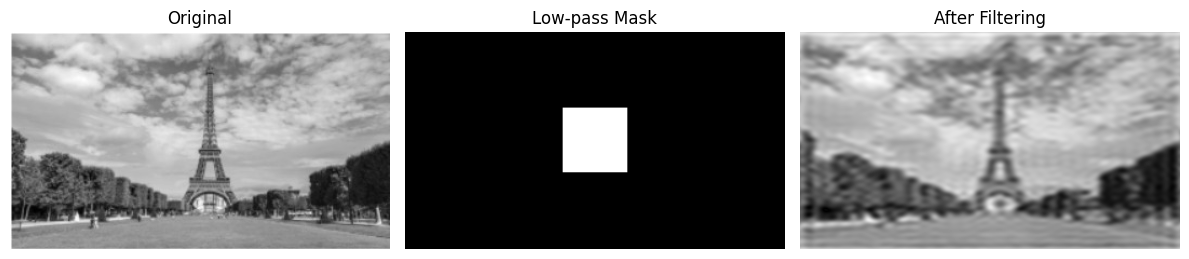

In [19]:
# c. Filtering in Frequency domain.
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread("Tower.jpg", 0)  

# ---------------- DFT ----------------
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Create a mask (low-pass filter)
rows, cols = img.shape
crow, ccol = rows // 2 , cols // 2   # center
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1   # square low-pass mask

# Apply mask and inverse DFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# ---------------- Plotting ----------------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask[:,:,0]*255, cmap='gray')
plt.title("Low-pass Mask")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_back, cmap='gray')
plt.title("After Filtering")
plt.axis("off")

plt.tight_layout()
plt.show()

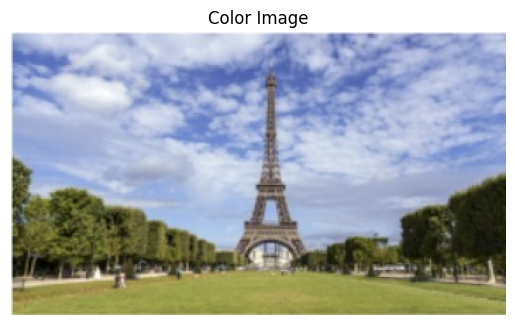

In [8]:
#9.A) Display of colour images.

import cv2
import matplotlib.pyplot as plt

# Load the image (OpenCV loads as BGR by default)
img = cv2.imread("Tower.jpg")

# Convert BGR to RGB for correct display in Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the color image
plt.imshow(img_rgb)
plt.title("Color Image")
plt.axis("off")
plt.show()

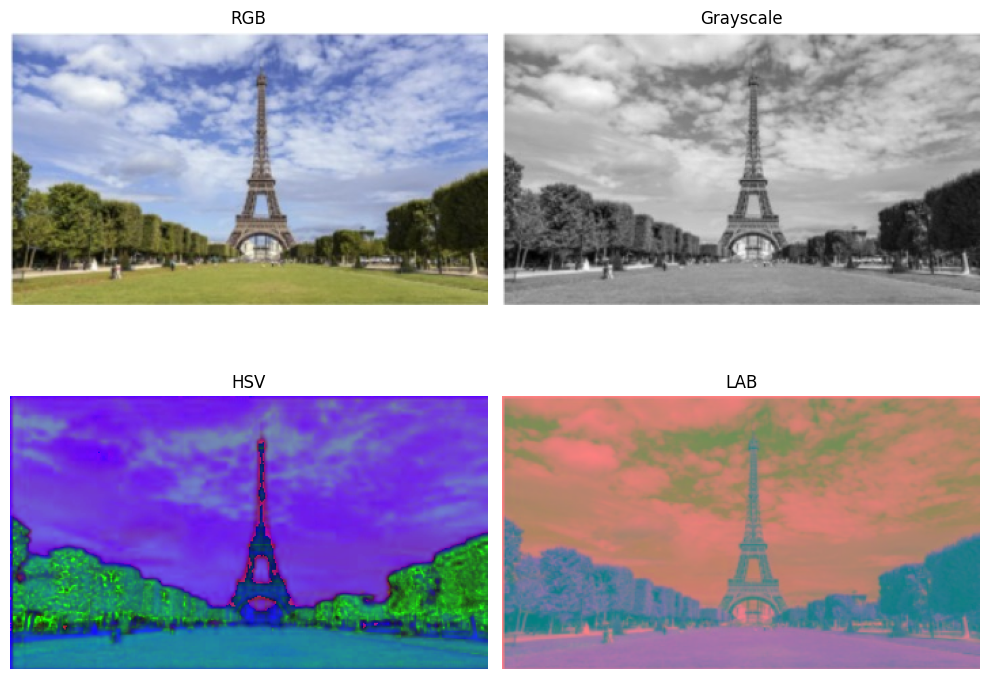

In [21]:
# b. Conversion between colour spaces.
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("Tower.jpg")

# Convert to RGB (for correct display in Matplotlib)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Convert to LAB
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# ------------------ Plotting ------------------
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
plt.imshow(rgb)
plt.title("RGB")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(hsv)
plt.title("HSV")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(lab)
plt.title("LAB")
plt.axis("off")

plt.tight_layout()
plt.show()

In [22]:
!pip install PyWavelets


  Using cached pywavelets-1.9.0-cp313-cp313-win_amd64.whl.metadata (7.6 kB)
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   -- ------------------------------------- 0.3/4.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.2 MB 1.0 MB/s eta 0:00:04
   ------- -------------------------------- 0.8/4.2 MB 1.2 MB/s eta 0:00:03
   --------- ------------------------------ 1.0/4.2 MB 1.2 MB/s eta 0:00:03
   ------------ --------------------------- 1.3/4.2 MB 1.3 MB/s eta 0:00:03
   -------------- ------------------------- 1.6/4.2 MB 1.3 MB/s eta 0:00:03
   ------------------- -------------------- 2.1/4.2 MB 1.4 MB/s eta 0:00:02
   ------------------------ --------------- 2.6/4.2 MB 1.6 MB/s eta 0:00:02
   ----------------------------- ---------- 3.1/4.2 MB 1.7 MB/s eta 0:00:01
   ------------------------------------- -- 3.9/4.2 MB 1.9 MB/s eta 0:00:01
   ------------------------------

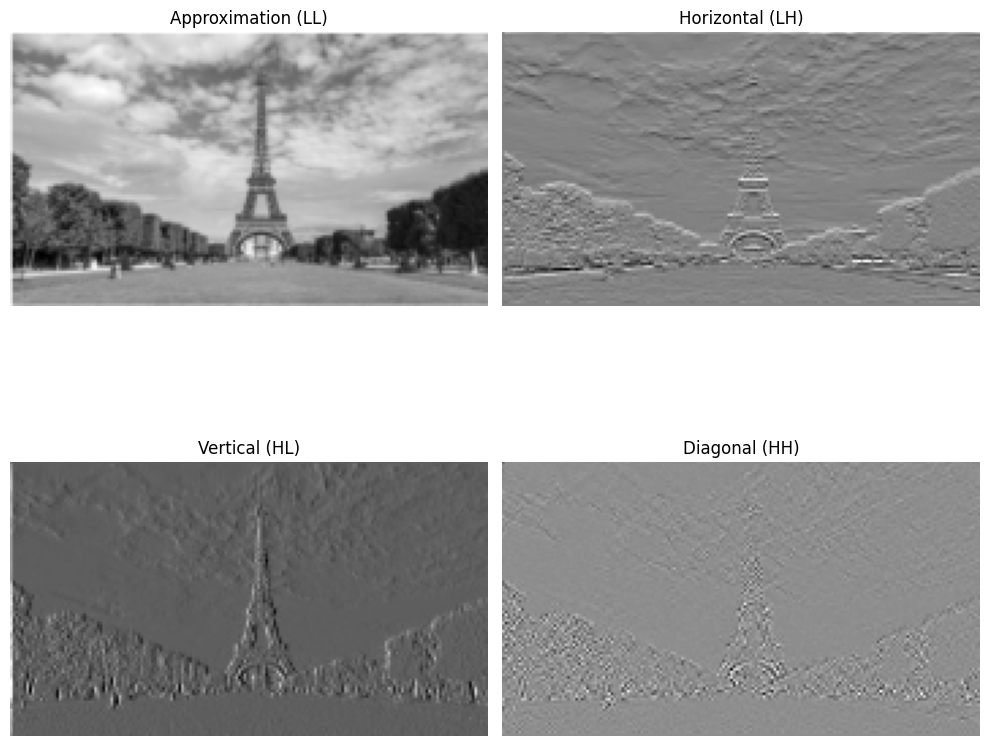

In [23]:
# 10 (A) DWT of images

import cv2
import matplotlib.pyplot as plt
import pywt

# Load the image in grayscale
img = cv2.imread("Tower.jpg", 0)

# Perform single-level 2D DWT
coeffs2 = pywt.dwt2(img, 'haar')
LL, (LH, HL, HH) = coeffs2

# ------------------ Plotting ------------------
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(LL, cmap='gray')
plt.title("Approximation (LL)")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(LH, cmap='gray')
plt.title("Horizontal (LH)")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(HL, cmap='gray')
plt.title("Vertical (HL)")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(HH, cmap='gray')
plt.title("Diagonal (HH)")
plt.axis("off")

plt.tight_layout()
plt.show()

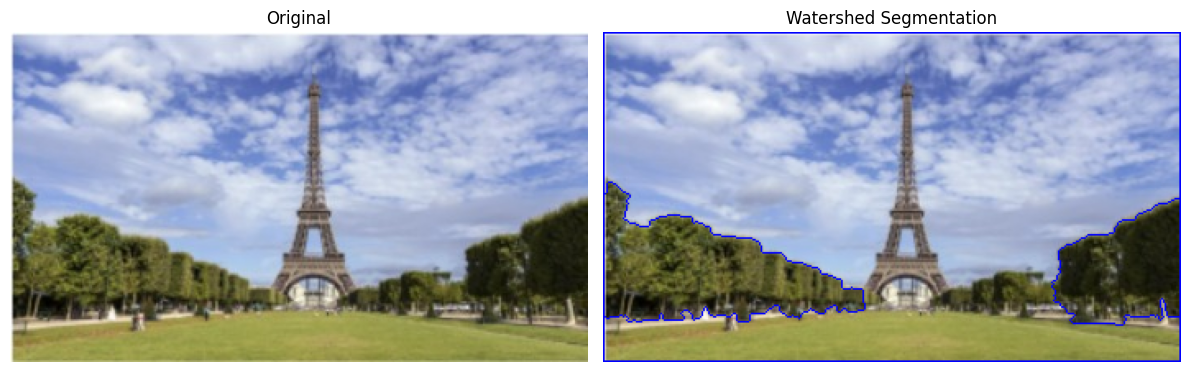

In [24]:
# b. Segmentation using watershed transform

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("Tower.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using Morphological operations
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0 but 1
markers = markers + 1

# Mark the unknown region with zero
markers[unknown == 255] = 0

# Apply watershed
markers = cv2.watershed(img, markers)
img_rgb[markers == -1] = [0, 0, 255]  # boundaries in red

# ------------------ Plotting ------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_rgb)
plt.title("Watershed Segmentation")
plt.axis("off")

plt.tight_layout()
plt.show()